In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['axes.titlesize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})
#import scienceplots
#plt.style.use(['science','ieee'])

from tqdm import tqdm
import random
import os
import time
import h5py
from datetime import datetime


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries

import auxLib; importlib.reload(auxLib)

Importing library...
Library successfully imported
Importing library...
Library successfully imported


<module 'auxLib' from 'd:\\Facultad\\Doctorado\\Proyectos\\paper\\auxLib.py'>

# Main variables

In [2]:
L = 40

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

first_neurons = [i for i in range(1,11)]
middle_neurons = [20 * i for i in range(1,6)]
last_neurons = [50 * i for i in range(3,21)]

neurons = first_neurons + middle_neurons + last_neurons

seed = 15

callbacks = auxLib.myCallback() # to be able to stop training if accuracy is high enough

In [3]:
training = ['para','neel','stripe']

modelsfolder, resultsfolder = auxLib.folders(directory=None, training=training)

In [6]:
data = auxLib.SyntheticImagesGen(training=training, L=L)

# Generate synthetic data

train_images, train_labels = data.dataGenerator(10000)
test_images, test_labels = data.dataGenerator(1000)

train_images = train_images.reshape((10000, L * L))
test_images = test_images.reshape((1000, L * L))

Generating synthetic data...
Done!
Elapsed time: 0.5445339679718018 seconds
Generating synthetic data...
Done!
Elapsed time: 0.03459930419921875 seconds


In [7]:
# Rearranging the labels

# As we have 3 classes: 0, 2 and 3, we need to fix them to be 0, 1 and 2

train_labels = np.where(train_labels == 2, 1, train_labels)
train_labels = np.where(train_labels == 3, 2, train_labels)

test_labels = np.where(test_labels == 2, 1, test_labels)
test_labels = np.where(test_labels == 3, 2, test_labels)

# Creating and training models

In [ ]:
for neuron in tqdm(neurons, desc=f"Generating DNN models", unit="neuron"):
    np.random.seed(seed)
    if neuron==1 or neuron==2:
        kernel_regularizer=tf.keras.regularizers.l2(0.001)
    else:   
        kernel_regularizer=tf.keras.regularizers.l2(0.01)

    dnn = auxLib.DenseNeuralNetworkGen() # Initializing. It generates the model

    dnn.build_model((L*L,), num_classes=3, layers=[
    {'type': 'dense', 'units': neuron, 'activation': 'relu', 'kernel_regularizer': kernel_regularizer},
    {'type': 'dropout', 'rate': 0.2},
    {'type': 'dense', 'units': 3, 'activation': 'softmax'} #2 is the number of classes: Paramagnetic and ferromagnetic
    ])

    dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    dnn.summary()

    dnn.fit(train_images, train_labels, 
            epochs=50, batch_size=20,
            validation_data=(test_images, test_labels), 
            callbacks=[callbacks],
            verbose=False)
    
    dnn.save_weights(f'dnn_n{neuron}_DO02', directory=modelsfolder) # name of the model (exclude the 'weights' and the extension)
    dnn.save_model(f'dnn_n{neuron}_DO02', directory=modelsfolder)

# Predictions

In [9]:
# Simulated images

# Initializing loader and saver

loader_init = auxLib.loader_and_saver(os.getcwd())

# Loading simulated images

sim_images, temperature = loader_init.simulatedImages(-1)

Loading simulated images...


Loading arrays: 100%|██████████| 156/156 [00:02<00:00, 59.09array/s]

Files loaded!
Data of density p = 1. succesfully loaded.


In [10]:
training = ['para','neel','stripe']

for neuron in neurons:
    index = neurons.index(neuron)

    model_path = os.path.join(modelsfolder, f'dnn_n{neuron}_DO02.h5')

    dnn = keras.models.load_model(model_path)

    prediction = auxLib.predictor(L, dnn, sim_images, neuron,
								training=training,
                                directory=resultsfolder, 
                                reshape = True, 
                                verbose=False, 
                                save_prediction=True)


Predicting: 100%|██████████| 155/155 [00:20<00:00,  7.40repetitions/s]


# Calculating critical temperature

Prediction for 1 neurons in hidden layer
T_c = 4.799568394544163


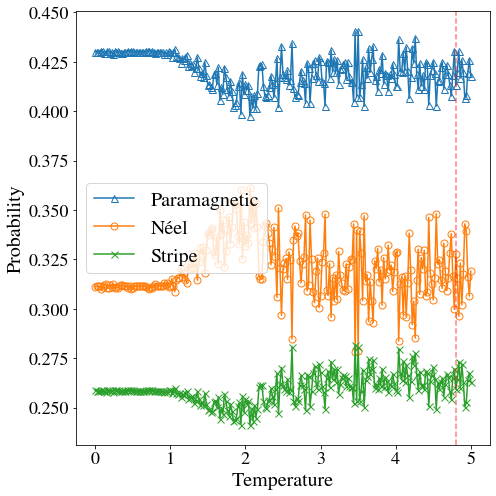

Prediction for 2 neurons in hidden layer
T_c = 4.9570634387651475


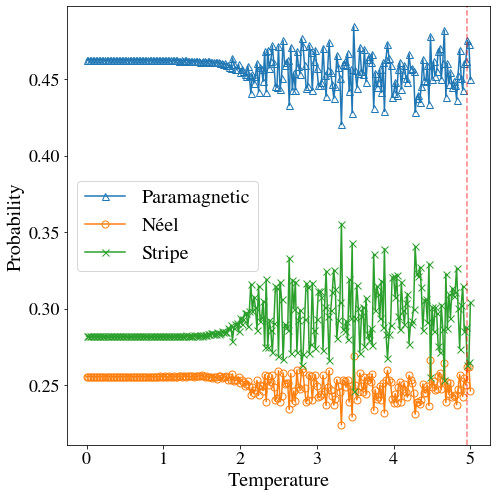

Prediction for 3 neurons in hidden layer
T_c = 0


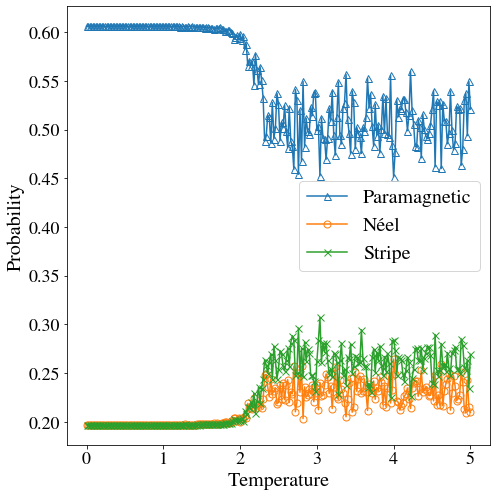

Prediction for 4 neurons in hidden layer
T_c = 0


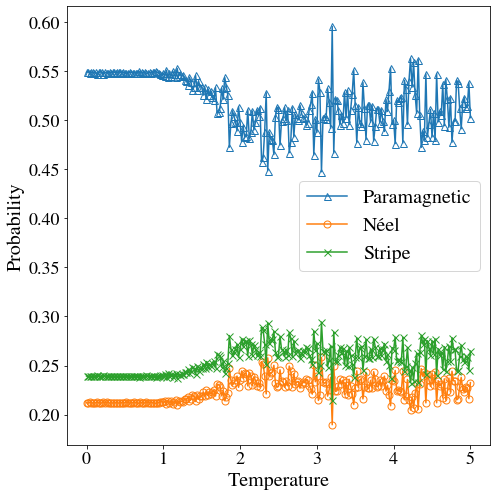

Prediction for 5 neurons in hidden layer
T_c = 0


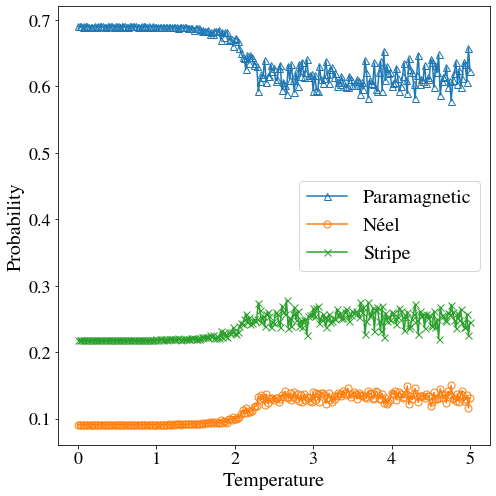

Prediction for 6 neurons in hidden layer
T_c = 0


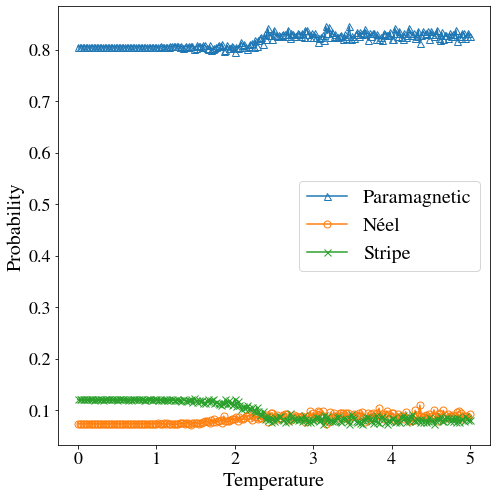

Prediction for 7 neurons in hidden layer
T_c = 0


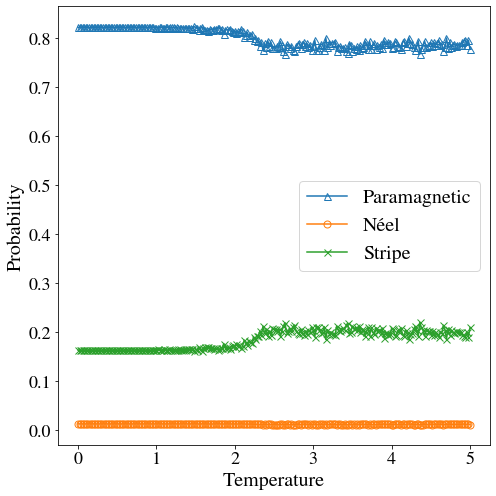

Prediction for 8 neurons in hidden layer
T_c = 0


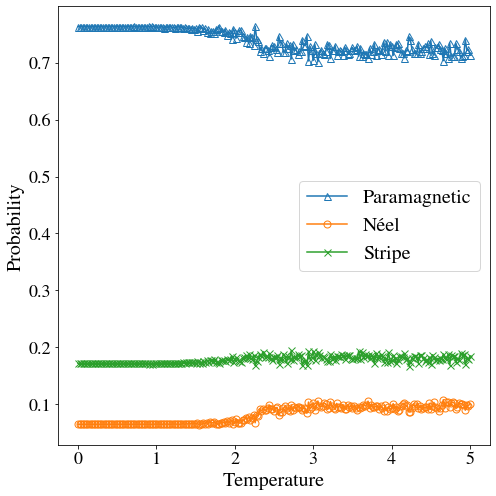

Prediction for 9 neurons in hidden layer
T_c = 0


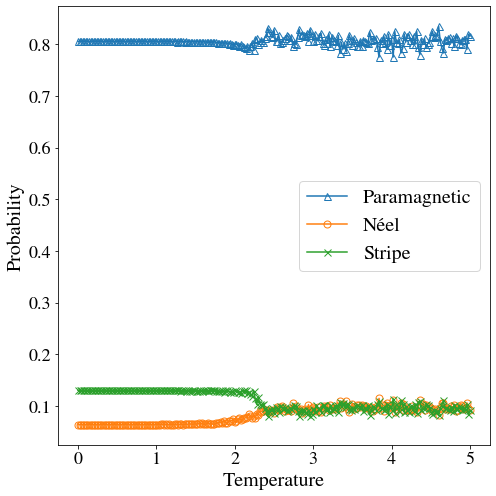

Prediction for 10 neurons in hidden layer
T_c = 0


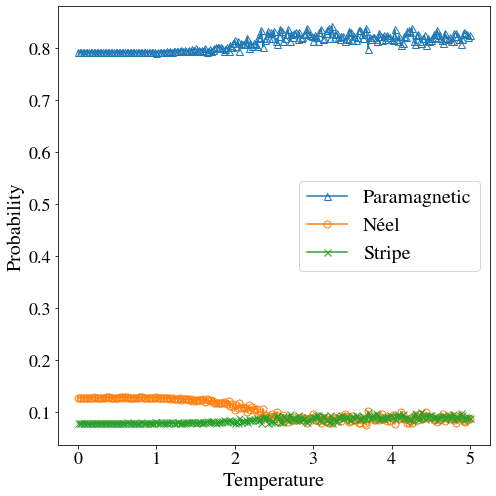

Prediction for 20 neurons in hidden layer
T_c = 0


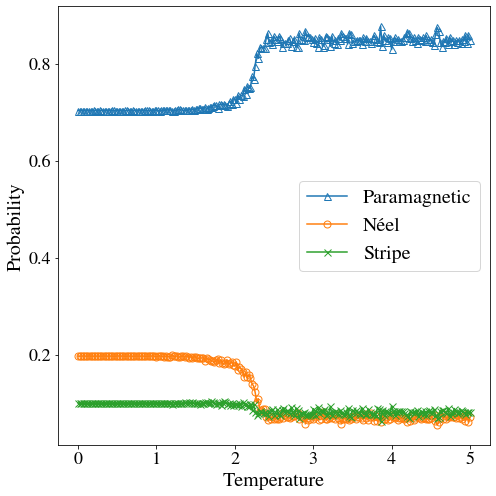

Prediction for 40 neurons in hidden layer
T_c = 0


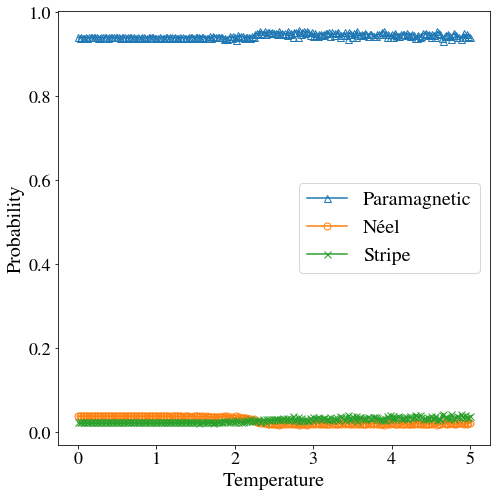

Prediction for 60 neurons in hidden layer
T_c = 0


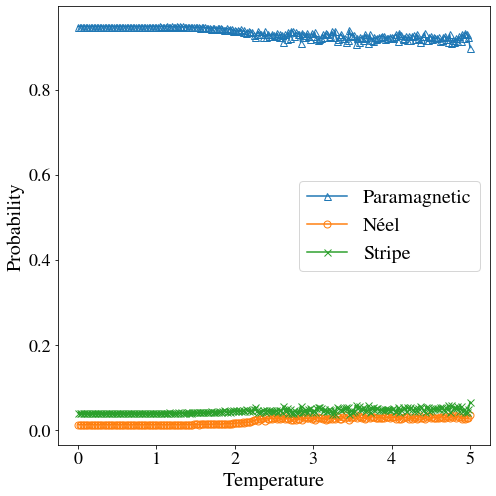

Prediction for 80 neurons in hidden layer
T_c = 0


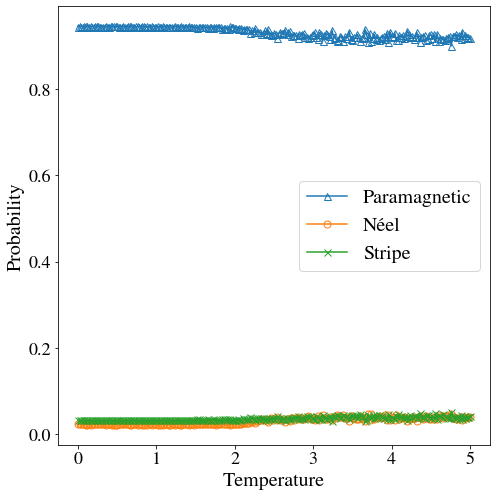

Prediction for 100 neurons in hidden layer
T_c = 0


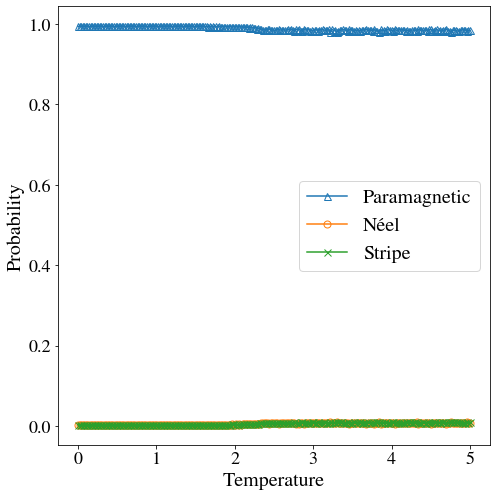

Prediction for 150 neurons in hidden layer
T_c = 0


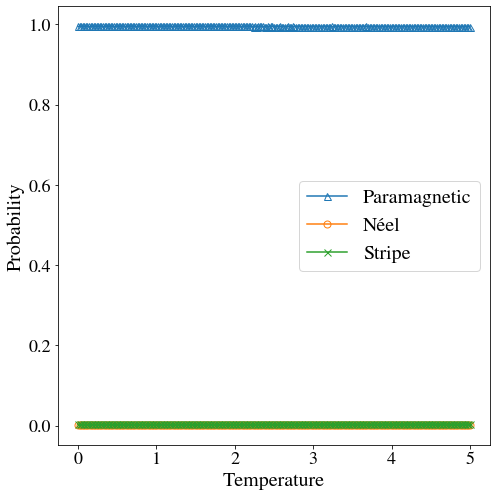

Prediction for 200 neurons in hidden layer
T_c = 0


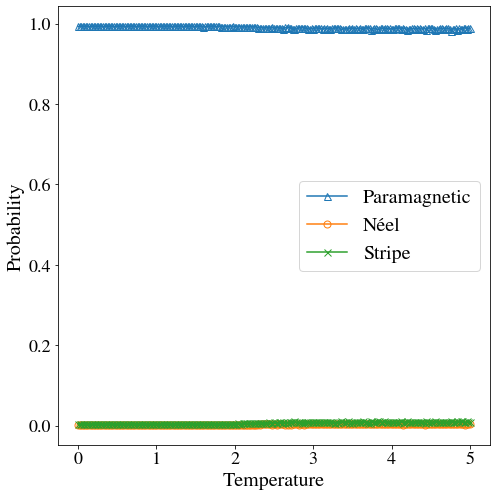

Prediction for 250 neurons in hidden layer
T_c = 0


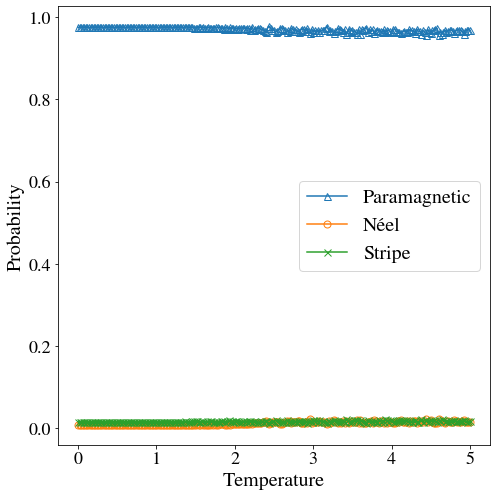

Prediction for 300 neurons in hidden layer
T_c = 0


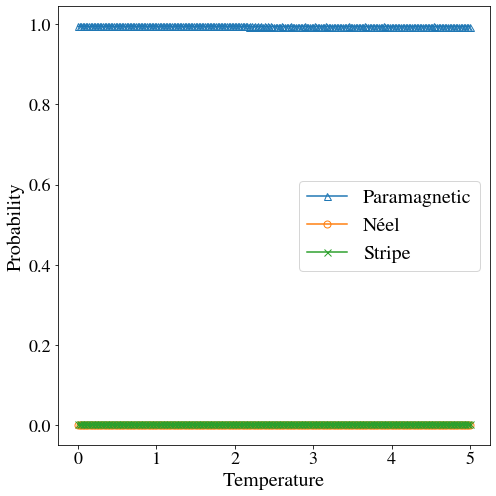

Prediction for 350 neurons in hidden layer
T_c = 0


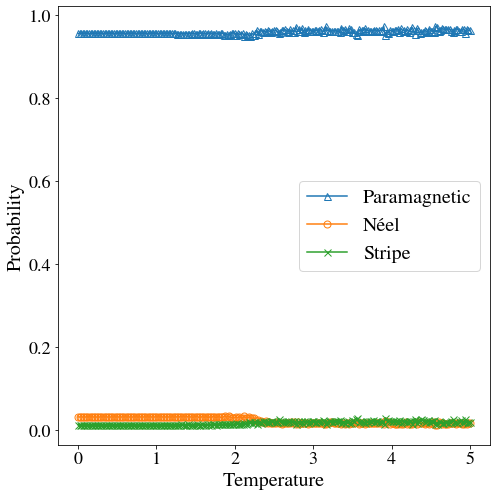

Prediction for 400 neurons in hidden layer
T_c = 0


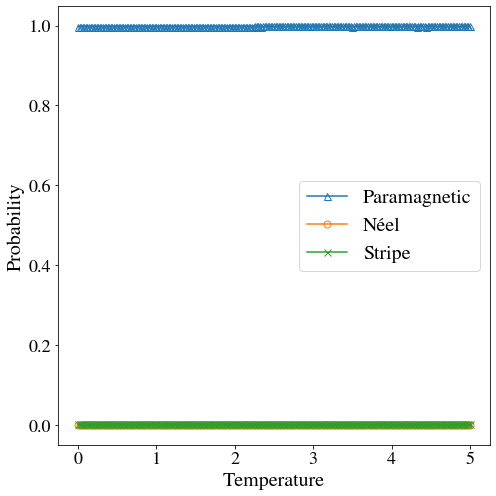

Prediction for 450 neurons in hidden layer
T_c = 0


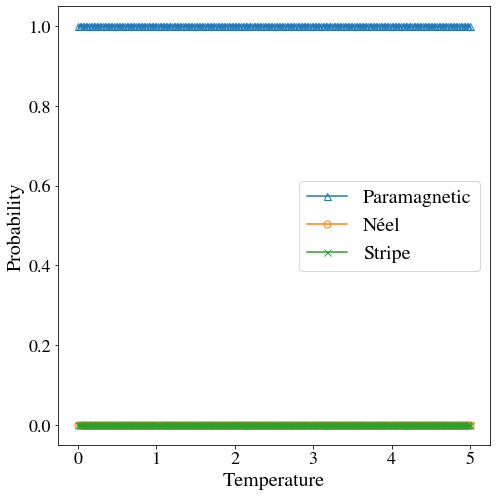

Prediction for 500 neurons in hidden layer
T_c = 0


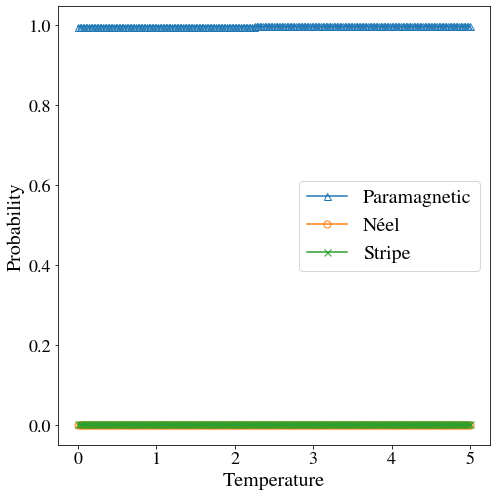

Prediction for 550 neurons in hidden layer
T_c = 0


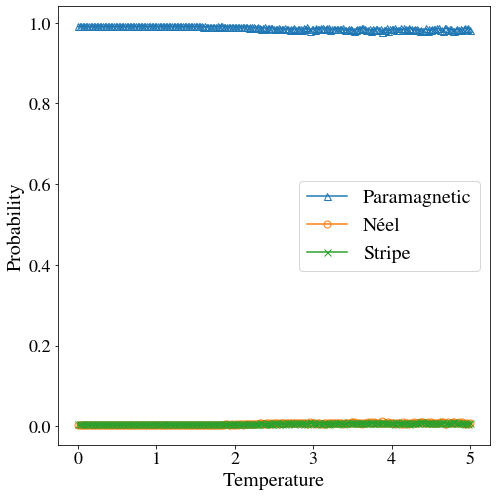

Prediction for 600 neurons in hidden layer
T_c = 0


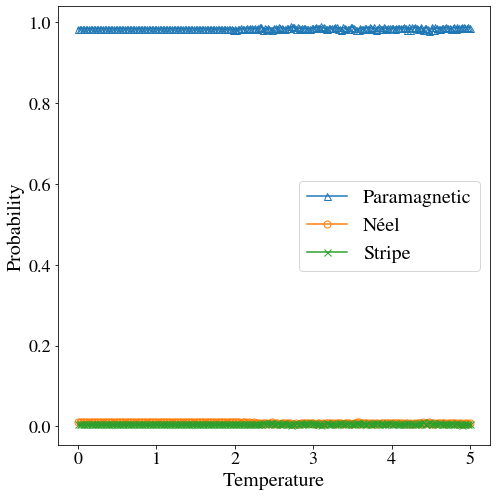

Prediction for 650 neurons in hidden layer
T_c = 0


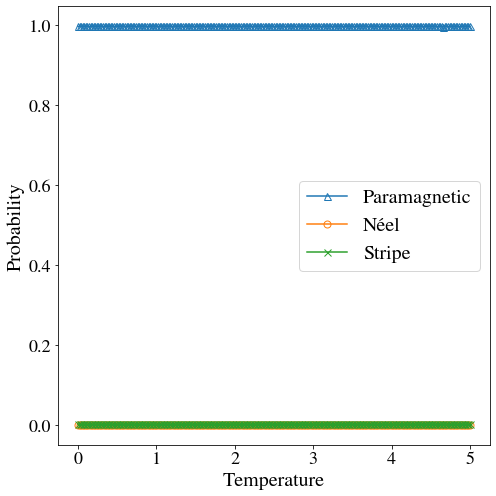

Prediction for 700 neurons in hidden layer
T_c = 0


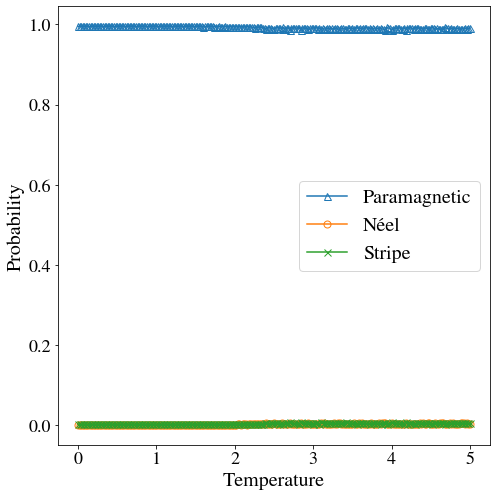

Prediction for 750 neurons in hidden layer
T_c = 0


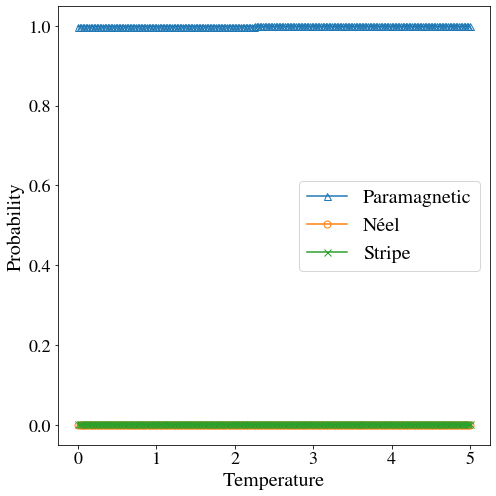

Prediction for 800 neurons in hidden layer
T_c = 0


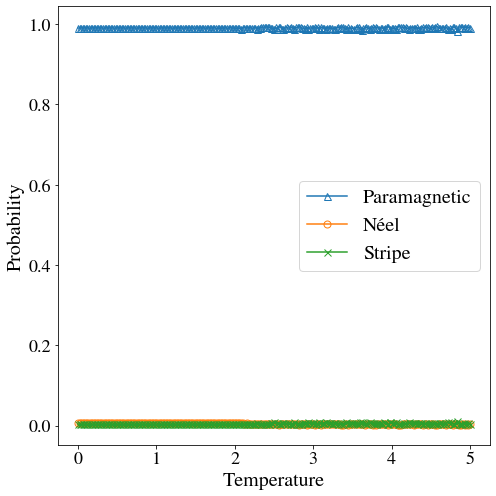

Prediction for 850 neurons in hidden layer
T_c = 0


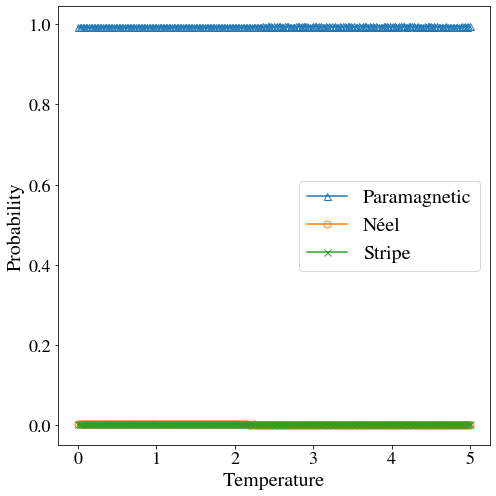

Prediction for 900 neurons in hidden layer
T_c = 0


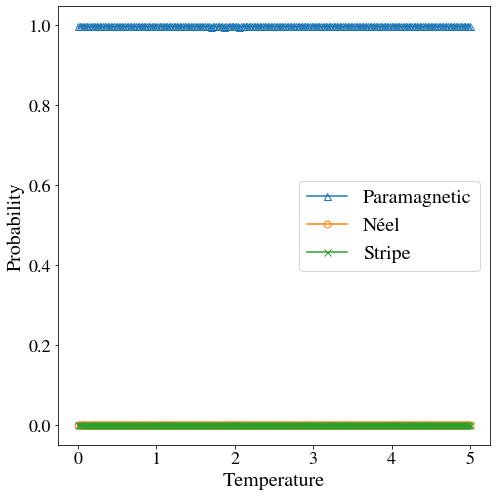

Prediction for 950 neurons in hidden layer
T_c = 0


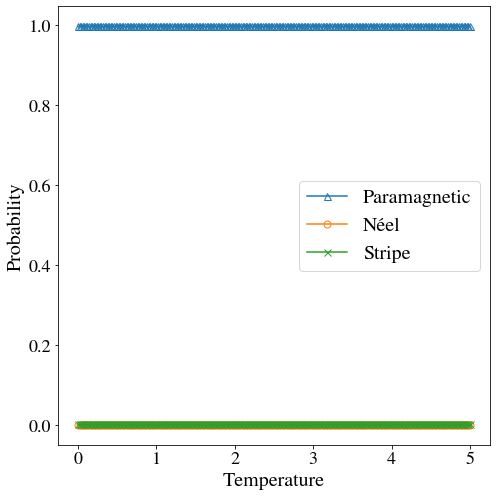

Prediction for 1000 neurons in hidden layer
T_c = 0


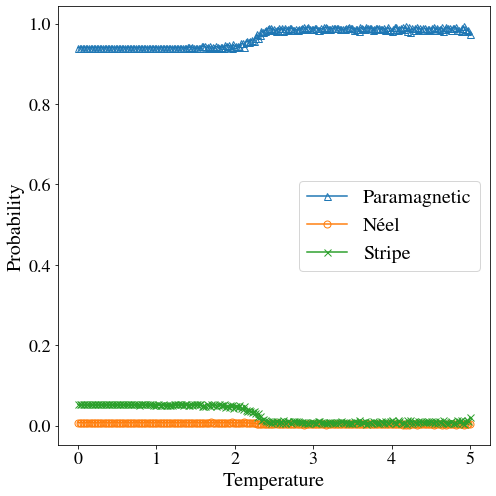

In [19]:
critical_temperatures = []

for neuron in neurons:
    prediction = pd.read_csv(resultsfolder+f'/predictions_{neuron}.csv', header=0).to_numpy(float)
    temperature, para, neel, stripe = prediction.T

    print(f'Prediction for {neuron} neurons in hidden layer')

    plt.figure(figsize=(7, 7))
    plt.plot(temperature, para, '^-', label='Paramagnetic', markerfacecolor='none', markersize=7)
    plt.plot(temperature, neel, 'o-', label='Néel', markerfacecolor='none', markersize=7)
    plt.plot(temperature, stripe, 'x-', label='Stripe', markerfacecolor='none', markersize=7)
    '''
    if neuron<8:
        plt.xlim((0.5, 3))
    else:
        plt.xlim((1.5, 3))
    '''
    plt.xlabel('Temperature')
    plt.ylabel('Probability')
    plt.legend()

    if max(para)>0.5:
        tc = 0
    else:
        index_half = np.where(para < 0.5)[0][-1]
        if index_half == 250:
            index_half = 249
        # Interpolation:
        tc = temperature[index_half] + (para[index_half]-0.5)*(temperature[index_half+1] - temperature[index_half]) / (para[index_half] - para[index_half+1])
        plt.axvline(x=tc,  color = 'red', linestyle = '--', alpha = 0.5)

    critical_temperatures.append(tc)
    print(f'T_c = {tc}')
    plt.savefig(os.path.join(resultsfolder, f'{neuron}neurons.pdf'))
    plt.show()

In [12]:
temp = pd.DataFrame((np.concatenate((np.array(neurons).reshape(len(neurons),1), 
                                    np.array(critical_temperatures).reshape(len(neurons),1)),axis=1)), 
                                    columns=['Neurons','Temperature'])
temp.to_csv(os.path.join(resultsfolder, 'critical_temperatures.csv'), index=False)

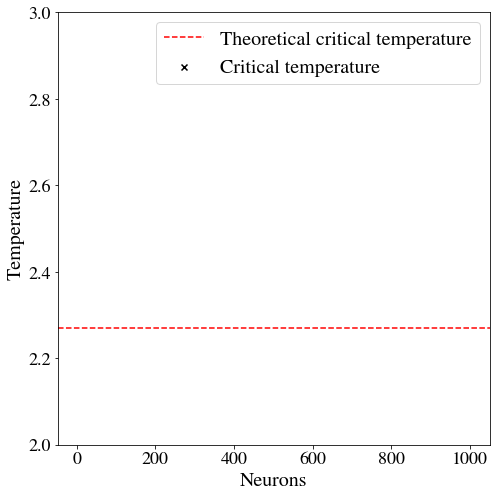

In [13]:
temp = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures.csv'))

plt.figure(figsize=(7, 7))
plt.scatter(temp['Neurons'][1:],temp['Temperature'][1:], marker='x', color='black', label='Critical temperature')
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')
plt.xlabel('Neurons')
plt.ylabel('Temperature')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.ylim((2, 3))
plt.legend(loc='upper right')
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures.pdf'))
plt.show()